# Part 1: Basic Function

In [1]:
import numpy as np
import pandas as pd
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# Part 2: Plotting

In [2]:
#Plotting data
data = pd.read_csv('ex1data1.txt', sep = ",", header = None)
data.columns = ["X", "y"]
m = len(data)
X = data['X'].values
y = data['y'].values.reshape(m,1)


In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(X,y, 'rx' )
ax.set_xlabel('Population of city in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Profits vs Population')


Text(0.5, 1.0, 'Profits vs Population')

# Part 3: Cost and Gradient Descent

In [4]:


ones = np.ones(m)
X_ = np.stack((ones, X), axis = 1) #Add a column of ones to x
theta = np.zeros((2,1))
iterations = 1500
alpha = 0.01


def computeCost(X, y, theta):
    '''
    COMPUTECOST Compute cost for linear regression
    J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    '''
    
    #initialise some useful values
    m = len(y)
    
    prediction = np.dot(X, theta)

    error = prediction - y
    
    J = 1/2/m * np.sum(np.square(error))
    
    return J



In [5]:

print('\nTesting the cost function ...\n')
# compute and display initial cost

J = computeCost(X_, y, theta);
print('With theta = [0 ; 0]\nCost computed = {}\n'.format(J))
print('Expected cost value (approx) 32.07\n')


Testing the cost function ...

With theta = [0 ; 0]
Cost computed = 32.072733877455676

Expected cost value (approx) 32.07



In [6]:
# further testing of the cost function
J = computeCost(X_, y, np.array([[-1], [2]]))
print('\nWith theta = [-1 , 2]\nCost computed = {}\n'.format(J))
print('Expected cost value (approx) 54.24\n')




With theta = [-1 , 2]
Cost computed = 54.24245508201238

Expected cost value (approx) 54.24



In [7]:
def gradientDescent(X,y, theta, alpha, num_iters):
    '''
    GRADIENTDESCENT Performs gradient descent to learn theta
    theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
    '''
    #Initialize some useful values
    m = len(y) #number of training examples
    J_history = np.zeros((num_iters, 1))
    
    for iter in range(num_iters):
        delta = np.zeros((len(theta), 1))
        for i in range(len(theta)):
            suM = (np.dot(X, theta) - y) * X[:, i].reshape(m,1)
            #print(suM)
            delta[i] = np.sum(suM)
        #print(delta)
        theta = theta - alpha/m * delta
        J_history[iter] = computeCost(X, y, theta)
    return theta, J_history
    

In [8]:
#Gradient Descent
print('\nRunning Gradient Descent ... \n')
theta, J_history = gradientDescent(X_, y, theta, alpha, iterations);

#print theta to screen
print('Theta found by gradient descent:\n');
print('%f\n', theta);
print('Expected theta values (approx)\n');
print(' -3.6303\n  1.1664\n\n');



Running Gradient Descent ... 

Theta found by gradient descent:

%f
 [[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)

 -3.6303
  1.1664




Text(0.5, 1.0, 'Profits vs Population')

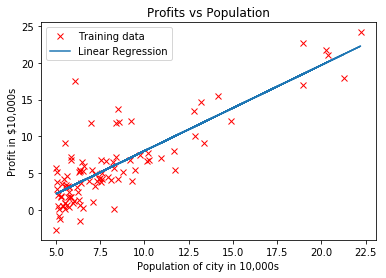

In [9]:
#Plot the linear fit
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(X,y, 'rx', label = 'Training data' )
ax.plot(X, np.dot(X_, theta), '-', label = 'Linear Regression')
ax.set_xlabel('Population of city in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.legend()
ax.set_title('Profits vs Population')



In [10]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot(np.array([1, 3.5]), theta)
print('For population = 35,000, we predict a profit of {}\n'.format(predict1*10000))
predict2 = np.dot(np.array([1, 7]), theta)
print('For population = 70,000, we predict a profit of {}\n'.format(predict2*10000))



For population = 35,000, we predict a profit of [4519.7678677]

For population = 70,000, we predict a profit of [45342.45012945]



# Part 4: Visualizing J(theta_0, theta_1)


In [11]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        #print(t.shape)
        J_vals[i,j] = computeCost(X_, y, t)
        

In [12]:
J_vals.shape

(100, 100)

Text(0.5, 0, 'theta_1')

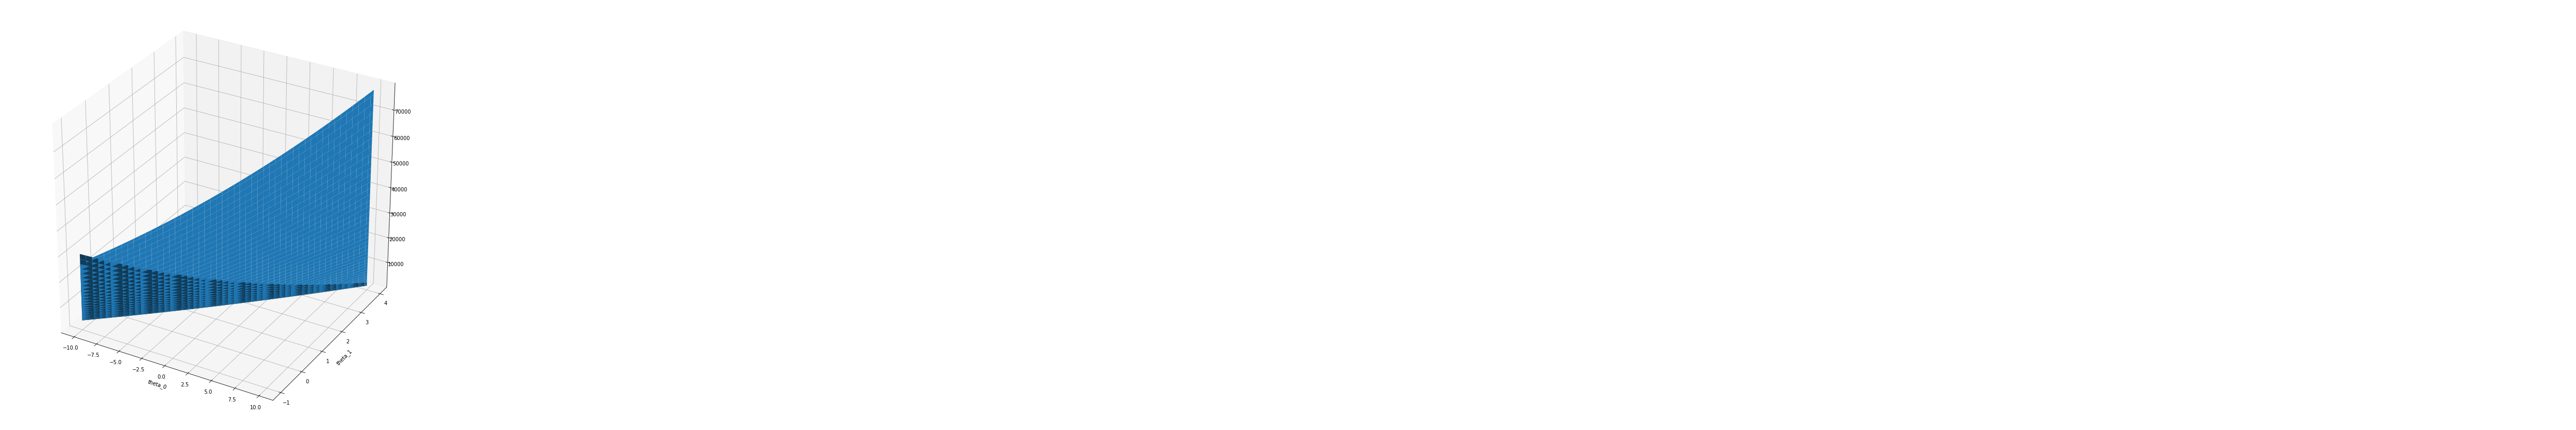

In [13]:
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection = '3d')

ax.plot_surface(theta0_vals, theta1_vals, J_vals)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')


Text(0, 0.5, 'theta_1')

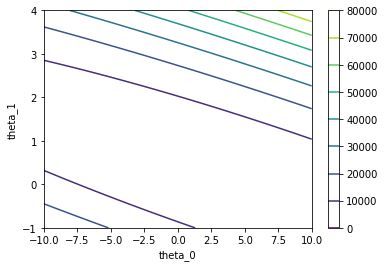

In [14]:
# Contour plot
from matplotlib import ticker, cm
fig, ax = plt.subplots()
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
CS = ax.contour(theta0_vals, theta1_vals, J_vals, )
cbar = fig.colorbar(CS)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')



# Linear Regression with Multiple Variables
# Part 1: Feature Normalization

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data_2 = pd.read_csv('ex1data2.txt', sep= ',', header = None)
data_2.columns = ['X1', 'X2', 'y']
data_2.head()

,X1,X2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [53]:
data_2 = data_2.values
m = len(data_2)
print('No. of training examples: {}'.format(m))
X = data_2[:, 0:2]
print('shape of X:{}'.format(X.shape))
y = data_2[:, -1].reshape(m,1)
print('Shape of X:{}'.format(y.shape))

No. of training examples: 47
shape of X:(47, 2)
Shape of X:(47, 1)


In [54]:
def addOnes(X):
    X = pd.DataFrame(X, columns = ['X1', 'X2'])
    X['X0'] = 1
    X = X[['X0', 'X1', 'X2']]
    X = X.values
    return X
    

In [55]:
# Scale and Normalize
def featureNormalize(X):
    '''
    featureNormalize(X) returns a normalized version of X, where the mean value is 0
    and the standard deviation is 0.
    '''
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma

X, mu, sigma = featureNormalize(X)
X = addOnes(X) #Add a column of ones to the X

# Part 2: Gradient Descent

In [60]:
def computeCostMulti(X, y, theta):
    m = len(X)
    errors = np.dot(X, theta) - y
    J = 1/2/m * np.sum(np.square(errors))
    return J

In [67]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    '''
    gradientDescentMulti performs gradient descent to learn theta
    theta = gradientDescentMulti(X, y, theta, alpha, num_iters)
    updates theta by taking num_iters gradient steps with learning rate alpha
    '''
    m = len(X)
    J_history = np.zeros((num_iters,1))
    for i in range(num_iters):
        h = np.dot(X, theta)
        errors = h - y
        theta_change = alpha/m * np.dot(X.T, errors)
        theta = theta - theta_change
        
        #Save the cost J in every iteration
        J_history[i] = computeCostMulti(X, y, theta)
    
    return theta, J_history

alpha = 0.01
num_iters = 400
theta = np.zeros((X.shape[1],1)).reshape(X.shape[1],1)

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

#Print theta
print('Theta computed from gradient descent: \n')
print('\n {}'.format(theta))


Theta computed from gradient descent: 


 [[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


Text(0, 0.5, 'Cost J')

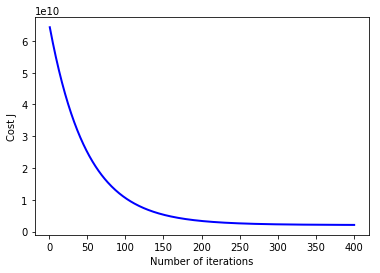

In [66]:
#plot the convergence graph
x_iter = np.arange(1, num_iters+1)

fig, ax = plt.subplots()
ax.plot(x_iter, J_history, '-b', lw = 2)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cost J')


In [71]:
alpha_list = [0.01, 0.03, 0.1, 0.3, 1]
theta1, J1 = gradientDescentMulti(X, y, np.zeros((X.shape[1],1)).reshape(X.shape[1],1), alpha_list[0], num_iters)
theta2, J2 = gradientDescentMulti(X, y, np.zeros((X.shape[1],1)).reshape(X.shape[1],1), alpha_list[1], num_iters)
theta3, J3 = gradientDescentMulti(X, y, np.zeros((X.shape[1],1)).reshape(X.shape[1],1), alpha_list[2], num_iters)
theta4, J4 = gradientDescentMulti(X, y, np.zeros((X.shape[1],1)).reshape(X.shape[1],1), alpha_list[3], num_iters)
theta5, J5 = gradientDescentMulti(X, y, np.zeros((X.shape[1],1)).reshape(X.shape[1],1), alpha_list[4], num_iters)

Text(0, 0.5, 'Cost J')

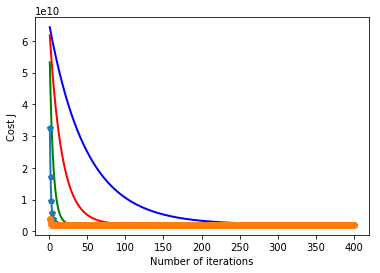

In [73]:
#plot the convergence graph
x_iter = np.arange(1, num_iters+1)

fig, ax = plt.subplots()
ax.plot(x_iter, J1, '-b', lw = 2)
ax.plot(x_iter, J2, '-r', lw = 2)
ax.plot(x_iter, J3, '-g', lw = 2)
ax.plot(x_iter, J4, '-p', lw = 2)
ax.plot(x_iter, J5, '-o', lw = 2)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cost J')


In [99]:
print(theta1)
print(theta2)
print(theta3)
print(theta4)
print(theta5)

[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]
[[340410.91897274]
 [109162.68848142]
 [ -6293.24735132]]
[[340412.65957447]
 [109447.79558639]
 [ -6578.3539709 ]]
[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]
[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


In [95]:
trial = np.array([1650, 3]).reshape(1,2)
trial = (trial - mu)/sigma
trial = addOnes(trial)

price1 = np.dot(trial, theta1)[0][0]
price2 = np.dot(trial, theta2)[0][0]
price3 = np.dot(trial, theta3)[0][0]
price4 = np.dot(trial, theta4)[0][0]
price5 = np.dot(trial, theta5)[0][0]

print('Predicted price of a 1650 sq-ft, 3 br house with different thetas are:\n{}'.format([price1, price2, price3, price4, price5]))

Predicted price of a 1650 sq-ft, 3 br house with different thetas are:
[289221.5473712181, 293142.4334854096, 293081.4645291686, 293081.46433489607, 293081.4643348961]


# Part 3: Normal Equations

In [97]:
from numpy import linalg
def normalEqn(X,y):
    inverse = linalg.inv(np.dot(X.T, X))
    right = np.dot(X.T, y)
    theta = np.dot(inverse, right)
    return theta

In [98]:
theta = normalEqn(X, y)
print('Theta computed from normal equations:\n{}'.format(theta))

price = np.dot(trial, theta)[0][0]

print('Predicted price of a 1650 sq-ft, 3 br house is {}'.format(price))

Theta computed from normal equations:
[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]
Predicted price of a 1650 sq-ft, 3 br house is 293081.4643348961
